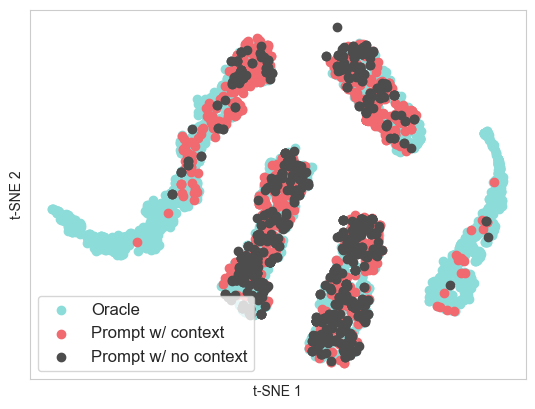

In [1]:
import seaborn as sns
import pickle
import matplotlib.pyplot as plt

import sys
import os
sys.path.append(os.path.abspath('..'))

import warnings
warnings.filterwarnings('ignore')

plt.figure()

dataset = 'covid'
seed=0
ns = 10
subgroup = 'Amarela'

# sns white-grid
sns.set_style("whitegrid")

# Import from investigate_saves
filename = f"./investigate_saves_all/investigate_{dataset}_{seed}_{ns}.pickle"

with open(filename, 'rb') as handle:
    raw_data = pickle.load(handle)


tsne_results = raw_data['tsne']


oracle_X = raw_data["results"]['Oracle']['X']
ids = oracle_X[subgroup]==1

X_oracle_pca = tsne_results['Oracle']

plt.scatter(X_oracle_pca[:, 0], X_oracle_pca[:, 1], label='Oracle', color='#8cdcda')



colors = ['#f16a70','#4d4d4d', '#b1d877', '#4d4d4d']
titles = ['Prompt w/ context', 'Prompt w/ no context', 'Original']

for idx, model in enumerate([ 'gpt4', 'gpt4_nocol']):

    X = raw_data["results"][model]['X']
    ids = X[subgroup]==1

    X_pca = tsne_results[model]#[ids]
    
    plt.scatter(X_pca[:, 0], X_pca[:, 1], label=titles[idx], color=colors[idx])
    
plt.grid(False)
plt.xticks([])
plt.yticks([])
plt.xlabel('t-SNE 1')
plt.ylabel('t-SNE 2')

plt.legend(loc='lower left', fontsize="12")

plt.show()